In [17]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

_Імпорт данних_

In [57]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.shape

(891, 12)

_Переглядаємо статистику по датасету_

In [20]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
new_df = df.dropna(subset=['Age'])

In [22]:
from scipy.stats import norm

_Розраховуємо середнє значення і стандартне відхилення_

In [23]:
mu, sigma = norm.fit(new_df['Age'])
print(f' mu = {mu} , sigma ={sigma}')

 mu = 29.69911764705882 , sigma =14.516321150817316


_Будуємо гістограму та графік нормального розподілу_

Text(0, 0.5, 'Густина розподілу')

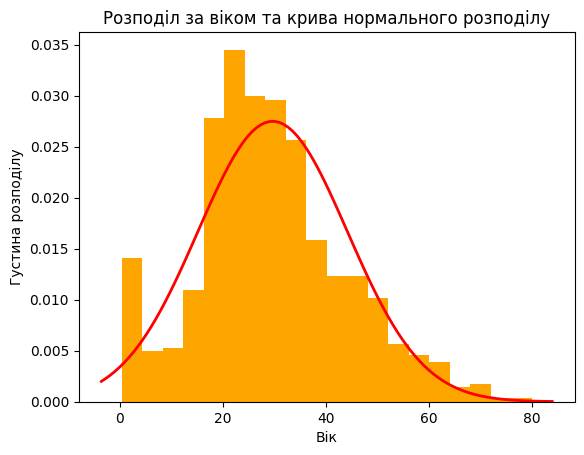

In [70]:
plt.hist(new_df['Age'], bins=20, density=True, color = 'orange')
xmin, xmax = plt.xlim() 
x = np.linspace(xmin, xmax, 100)   
p = norm.pdf(x, mu, sigma)  
plt.plot(x, p, 'red', linewidth=2)

plt.title('Розподіл за віком та крива нормального розподілу')
plt.xlabel('Вік')
plt.ylabel('Густина розподілу')

_Біномінальний та Пуассоновий розподіли не є відповідними для стовпця 'Age', який є безперервною випадковою величиною. Використання цих розподілів у цьому контексті є неправильним і може бути недостатньо точним, не маючи практичного застосування._

__Діаграма біномінального розподілу__

In [40]:
from scipy.stats import binom

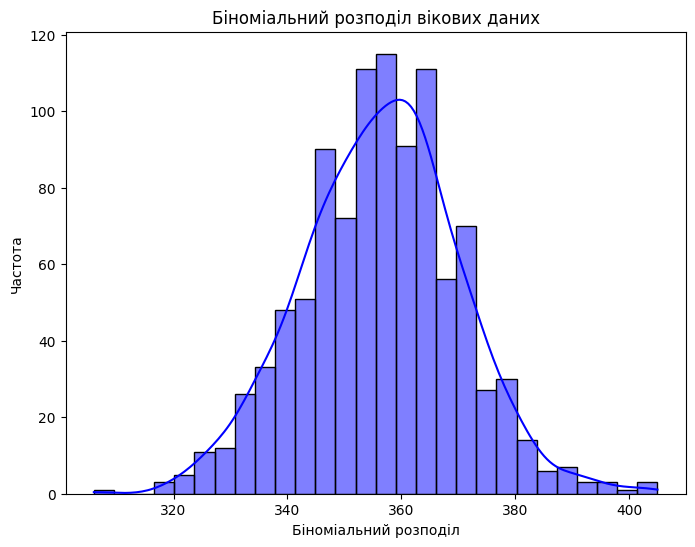

In [61]:
plt.figure(figsize=(8, 6))
sns.histplot(binom.rvs(len(new_df.Age), 0.5, loc=0, size=1000) , kde=True, color='blue')
plt.xlabel('Біноміальний розподіл')
plt.ylabel('Частота')
plt.title('Біноміальний розподіл вікових даних')
plt.show()

__Діаграма розподілу Пуассона__

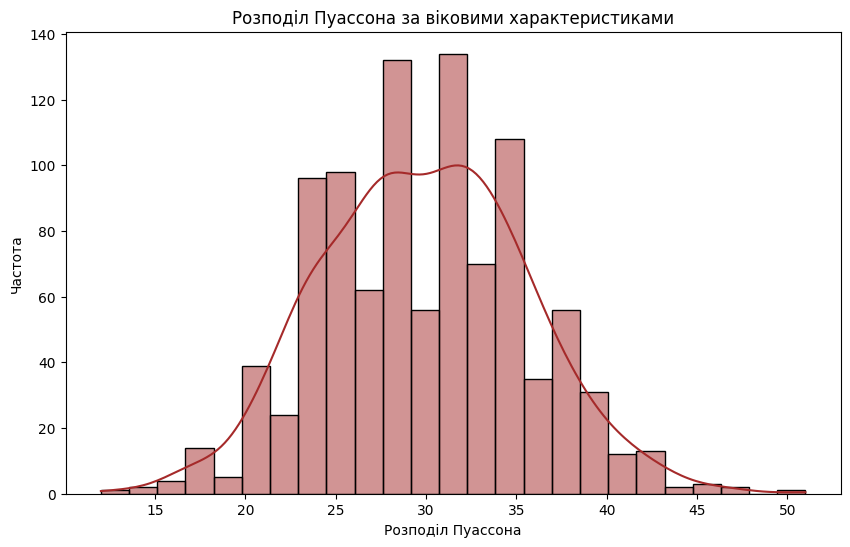

In [71]:
from scipy.stats import poisson

plt.figure(figsize=(10, 6))
sns.histplot(poisson.rvs(mu, size=1000), kde=True, color='brown')
plt.xlabel('Розподіл Пуассона')
plt.ylabel('Частота')
plt.title('Розподіл Пуассона за віковими характеристиками')
plt.show()

# Заповнення пропущенних данних

In [26]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [33]:
data['Cabin'].fillna('Unknown', inplace=True)

In [34]:
data['Embarked'].fillna(data['Embarked'].mode().values[0], inplace=True)

In [36]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Cabin_Deck     0
dtype: int64

In [37]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,U
